## ML Project - Dataset 1 - Spotify

# Exploration

Number of samples: 953
Number of raw features: 25
Fraction of missing values per column:
in_shazam_charts    0.052466
key                 0.099685
dtype: float64
Number of categorical variables: 7
Categorical variables: ['artist_count', 'released_month', 'released_day', 'in_deezer_charts', 'key', 'mode', 'instrumentalness_%']


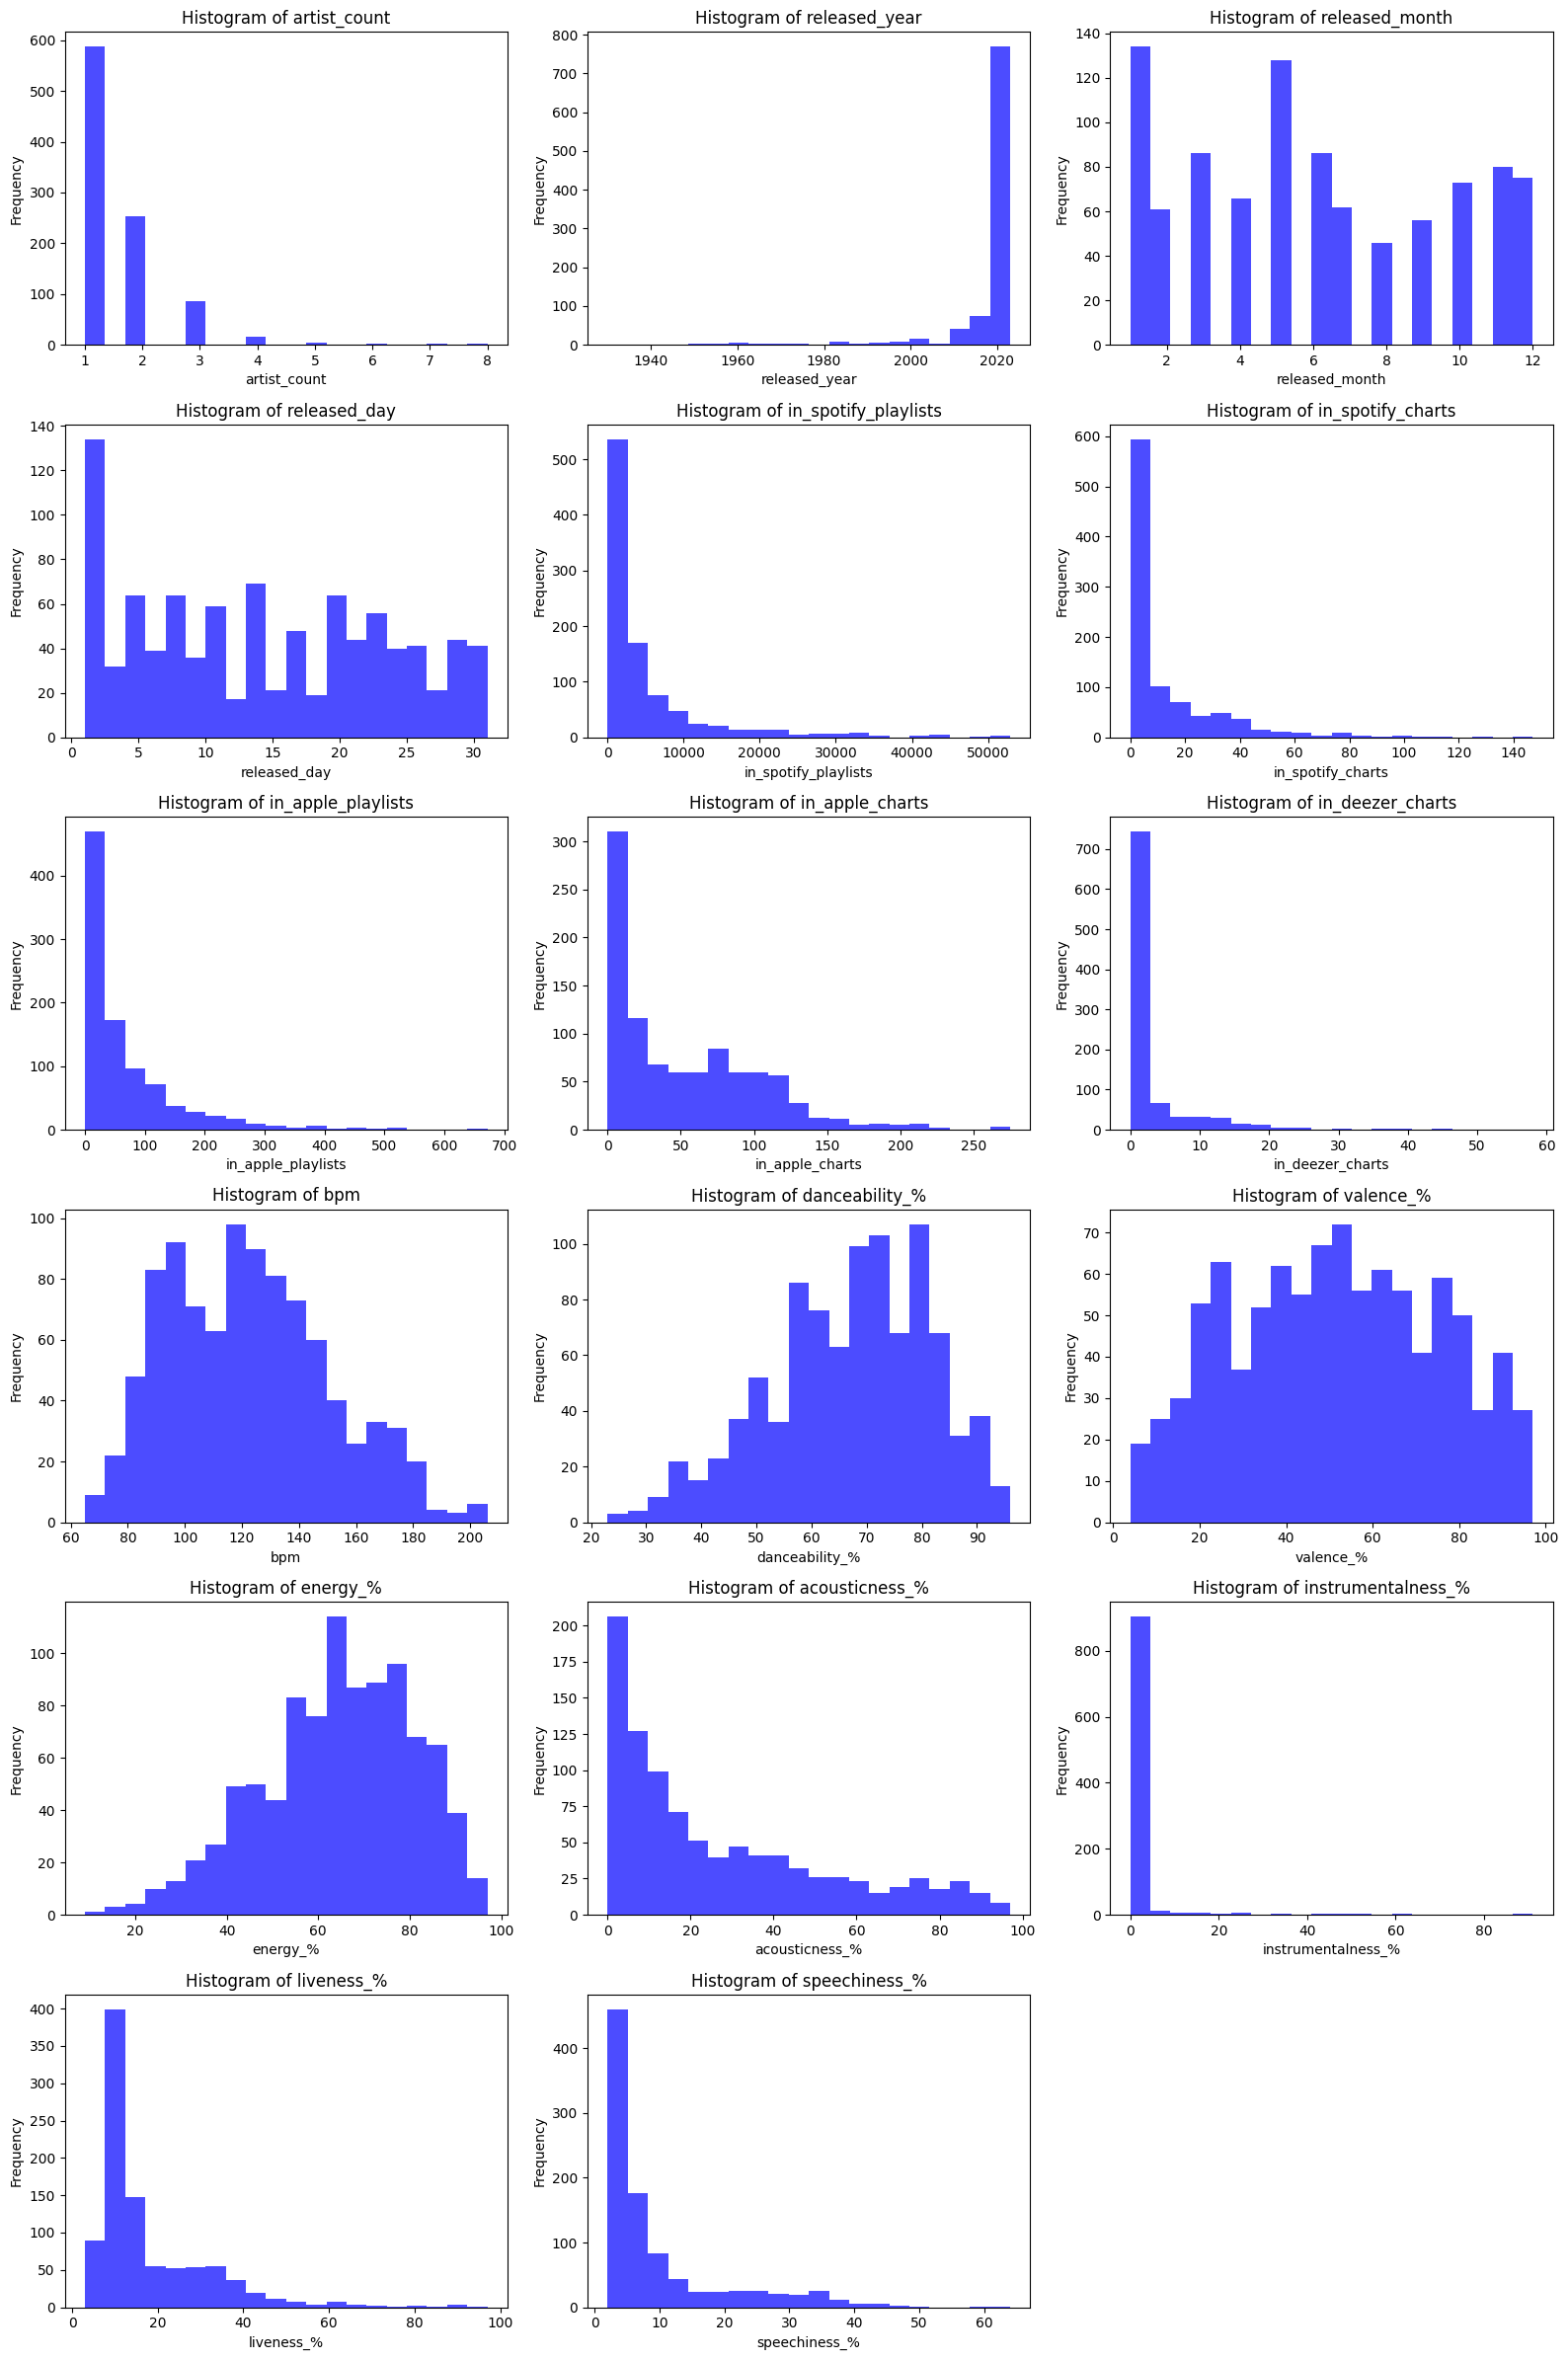

In [320]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

file_path = '/Users/dakshkhetarpaul/Desktop/ML443-Final-Project/Datasets/Spotify Most Streamed Songs.csv'

# Load the data
training_data = pd.read_csv(file_path)

# Number of samples and raw features
num_samples = training_data.shape[0]
num_features = training_data.shape[1]
print(f"Number of samples: {num_samples}")
print(f"Number of raw features: {num_features}")

# Fraction of missing values
missing_values = training_data.isnull().sum() / num_samples
fraction_missing = missing_values[missing_values > 0]
if fraction_missing.empty:
    print("No missing values in the dataset.")
else:
    print("Fraction of missing values per column:")
    print(fraction_missing)

# Identify categorical columns, choosing 20

def find_categorical_columns(dataframe, unique_threshold=40):
    categorical_columns = []
    for column in dataframe.columns:
        unique_values = dataframe[column].nunique()
        if unique_values <= unique_threshold:
            categorical_columns.append(column)
    return categorical_columns


categorical_columns = find_categorical_columns(training_data)
num_categorical = len(categorical_columns)
print(f"Number of categorical variables: {num_categorical}")
print(f"Categorical variables: {categorical_columns}")

# Histograms

numeric_columns = training_data.select_dtypes(include=['number']).columns

# Define the number of histograms per row
cols_per_row = 3
num_cols = len(numeric_columns)

# Calculate the number of rows needed
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Equivalent to math.ceil(num_cols / cols_per_row)

# Create a figure for subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(16, num_rows * 4))  # Adjust size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each histogram
for i, col in enumerate(numeric_columns):
    axes[i].hist(training_data[col], bins=20, alpha=0.7, color='blue')  # Histogram for the current column
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(False)

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


Based on the above results, the number of samples is 953, we have 25 raw features
Fraction of missing values per column:
in_shazam_charts    0.052466
key                 0.099685
Number of categorical variables: 7
Categorical variables: ['artist_count', 'released_month', 'released_day', 'in_deezer_charts', 'key', 'mode', 'instrumentalness_%'], all these correspond to the histogram observations

It can also be observed from the histograms that majority of songs have a very low values of speechiness,liveness, acousticness.

1 non-numeric or missing values in 'streams' column.


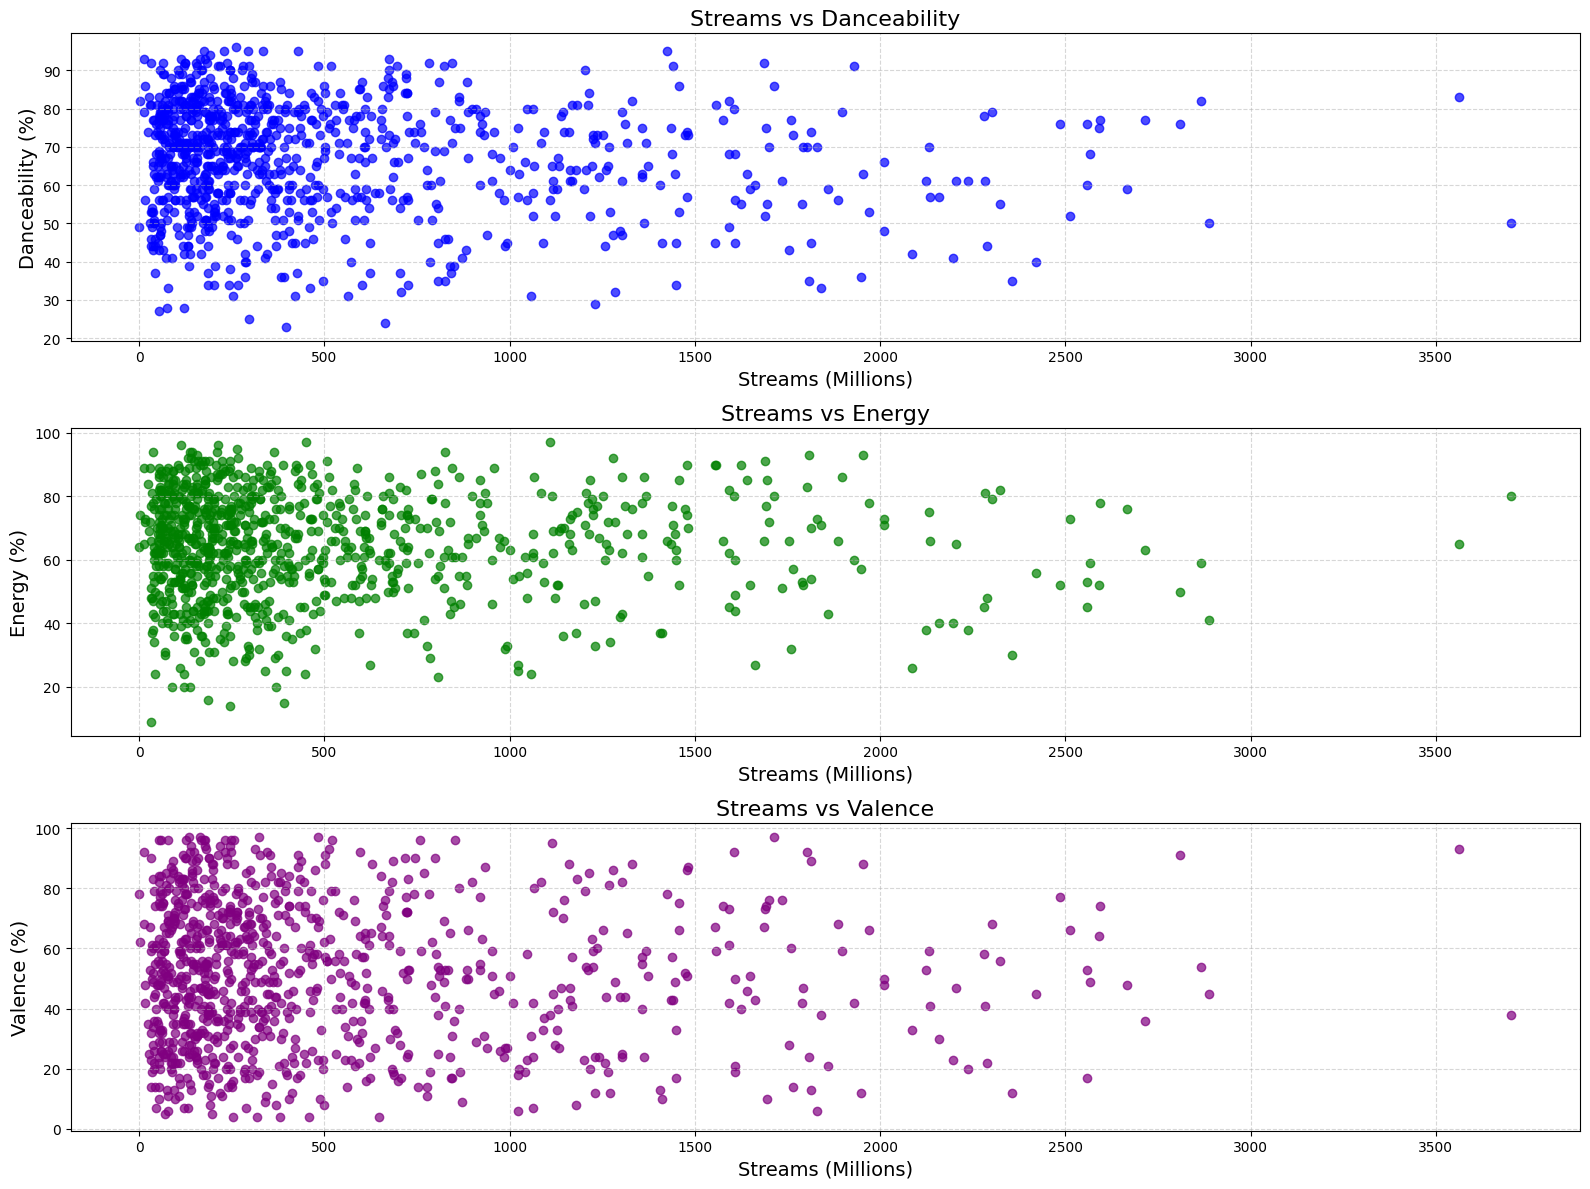

In [321]:
# Check and convert 'streams' to numeric
training_data['streams'] = pd.to_numeric(training_data['streams'], errors='coerce')

# Verify if there are any non-numeric or missing values after conversion
print(training_data['streams'].isnull().sum(), "non-numeric or missing values in 'streams' column.")

# Convert streams to millions for plotting
training_data['streams_millions'] = training_data['streams'] / 1e6

plt.figure(figsize=(16, 12))

# Scatter plot for Streams vs Danceability
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.scatter(training_data['streams_millions'], training_data['danceability_%'], alpha=0.7, color='blue')
plt.title('Streams vs Danceability', fontsize=16)
plt.xlabel('Streams (Millions)', fontsize=14)
plt.ylabel('Danceability (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Scatter plot for Streams vs Energy
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.scatter(training_data['streams_millions'], training_data['energy_%'], alpha=0.7, color='green')
plt.title('Streams vs Energy', fontsize=16)
plt.xlabel('Streams (Millions)', fontsize=14)
plt.ylabel('Energy (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Scatter plot for Streams vs Valence
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.scatter(training_data['streams_millions'], training_data['valence_%'], alpha=0.7, color='purple')
plt.title('Streams vs Valence', fontsize=16)
plt.xlabel('Streams (Millions)', fontsize=14)
plt.ylabel('Valence (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Here, It can be observed that the majority of songs are having higher values of Danceability and energy, this does correlate to the real world. However in the case of Valence(Higher value means positive/happy song, Lower value means negative/song) there is a proper balance, which indicates personal prefrences vary by people

# Pre-Processing

First we will Split the Training And Testing Data, and then use K fold on the training data

In [322]:
total_data = pd.read_csv(file_path)
from sklearn.model_selection import train_test_split, KFold # train_test_split splits the data in training and testing with shuffle, K fold  takes K as input

#splitting
train_data, test_data = train_test_split(total_data, test_size=0.2, random_state=42, shuffle=True)



print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))

# Set up K-fold cross-validation on the training data
kf = KFold(n_splits=5, shuffle=True, random_state=15) # make sure each time the shuffle is same, shuffle again for more reliable results

# Example usage: iterating through folds
for fold, (train_idx, val_idx) in enumerate(kf.split(train_data)):
    fold_train = train_data.iloc[train_idx]
    fold_val = train_data.iloc[val_idx]
    print(f"Fold {fold+1}:")
    print(" - Training fold size:", len(fold_train))
    print(" - Validation fold size:", len(fold_val))


Training set size: 762
Testing set size: 191
Fold 1:
 - Training fold size: 609
 - Validation fold size: 153
Fold 2:
 - Training fold size: 609
 - Validation fold size: 153
Fold 3:
 - Training fold size: 610
 - Validation fold size: 152
Fold 4:
 - Training fold size: 610
 - Validation fold size: 152
Fold 5:
 - Training fold size: 610
 - Validation fold size: 152


Preprocessing Steps:

1. Convert column to numeric, non-numeric entries become NaN.
2. Replace all negative values with NaN.
3. If the column name ends with %, replace all values > 100 with NaN.
4. Compute the mean from the remaining valid values.
5. Replace all NaNs (including those from non-numeric, negative, or >100 entries) with the mean.
6. For text based columns, replace Nan with "not provided"

In [323]:
excluded_cols = ["track_name", "artist(s)_name", "key", "mode", "cover_url"]
processed_folds = {}

for fold, (train_idx, val_idx) in enumerate(kf.split(train_data)):
    # Create copies to avoid warnings
    fold_train = train_data.iloc[train_idx].copy()
    fold_val = train_data.iloc[val_idx].copy()  
    
    print(f"\n{'='*40}")
    print(f"Processing Fold {fold+1}")
    print(f"{'='*40}")
    
    # Preprocessing the training fold
    for col in fold_train.columns:
        if col not in excluded_cols:
            # Remove commas if column ends with "charts" or "playlists"
            if col.endswith("charts") or col.endswith("playlists"):
                fold_train[col] = fold_train[col].astype(str).str.replace(",", "", regex=True)
            
            # Convert to numeric
            fold_train[col] = pd.to_numeric(fold_train[col], errors='coerce')
            
            # Replace negative values with NaN
            negative_mask = (fold_train[col] < 0)
            negative_count = negative_mask.sum()
            if negative_count > 0:
                fold_train.loc[negative_mask, col] = float('nan')
            
            # If column ends with '%', replace values > 100 with NaN
            above_100_count = 0
            if col.endswith('%'):
                above_100_mask = (fold_train[col] > 100)
                above_100_count = above_100_mask.sum()
                if above_100_count > 0:
                    fold_train.loc[above_100_mask, col] = float('nan')
            
            # Compute mean after replacements
            col_mean = fold_train[col].mean(skipna=True)
            nan_count = fold_train[col].isna().sum()
            
            # Replace NaNs with mean
            if nan_count > 0 and pd.notna(col_mean):
                fold_train[col] = fold_train[col].fillna(col_mean)
            
            # Print summary of changes
            changes = []
            if nan_count > 0:
                changes.append(f"replaced {nan_count} NaN values with mean")
            if negative_count > 0:
                changes.append(f"set {negative_count} negative values to NaN before mean")
            if above_100_count > 0:
                changes.append(f"set {above_100_count} values above 100 to NaN before mean")
            if col.endswith("charts") or col.endswith("playlists"):
                changes.append("removed commas")
            
            if changes:
                print(f"Column '{col}': " + ", ".join(changes) + ".")
                
        else:
            # For excluded columns, replace empty/NaN with "not provided"
            not_provided_count = fold_train[col].isna().sum()
            if not_provided_count > 0:
                fold_train[col] = fold_train[col].fillna("not provided")
                print(f"Column '{col}': replaced {not_provided_count} empty values with 'not provided'.")
    # Preprocessing the validation fold using val's own stats
    for col in fold_val.columns:
        if col not in excluded_cols:
            if col.endswith("charts") or col.endswith("playlists"):
                fold_val[col] = fold_val[col].astype(str).str.replace(",", "", regex=True)
            fold_val[col] = pd.to_numeric(fold_val[col], errors='coerce')

            negative_mask = (fold_val[col] < 0)
            negative_count = negative_mask.sum()
            if negative_count > 0:
                fold_val.loc[negative_mask, col] = float('nan')

            above_100_count = 0
            if col.endswith('%'):
                above_100_mask = (fold_val[col] > 100)
                above_100_count = above_100_mask.sum()
                if above_100_count > 0:
                    fold_val.loc[above_100_mask, col] = float('nan')

            col_mean = fold_val[col].mean(skipna=True)
            nan_count = fold_val[col].isna().sum()
            if nan_count > 0 and pd.notna(col_mean):
                fold_val[col] = fold_val[col].fillna(col_mean)

        else:
            not_provided_count = fold_val[col].isna().sum()
            if not_provided_count > 0:
                fold_val[col] = fold_val[col].fillna("not provided")

    # Also ensure val fold is cleaned similarly if needed:
    if fold == 0:
        print("\nFirst 5 rows of the training set after preprocessing (Fold 1):")
        print(fold_train.head())
        print("\nFirst 5 rows of the validation set after preprocessing (Fold 1):")
        print(fold_val.head())

    # Store the processed folds
    processed_folds[fold] = {"train": fold_train, "val": fold_val}



Processing Fold 1
Column 'in_spotify_playlists': removed commas.
Column 'in_spotify_charts': removed commas.
Column 'in_apple_playlists': removed commas.
Column 'in_apple_charts': removed commas.
Column 'in_deezer_playlists': removed commas.
Column 'in_deezer_charts': removed commas.
Column 'in_shazam_charts': replaced 32 NaN values with mean, removed commas.
Column 'key': replaced 62 empty values with 'not provided'.

First 5 rows of the training set after preprocessing (Fold 1):
                    track_name         artist(s)_name  artist_count  \
318           Malas Decisiones               Kenia OS             1   
545                   Softcore      The Neighbourhood             1   
557                  Lï¿½ï¿½ï¿                Stromae             1   
109       Set Fire to the Rain                  Adele             1   
77   Unholy (feat. Kim Petras)  Sam Smith, Kim Petras             2   

     released_year  released_month  released_day  in_spotify_playlists  \
318         

In [324]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Update excluded columns if needed
excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_year", "released_day"]
percent_cols = [col for col in fold_train.columns if col.endswith('%')]
excluded_cols.extend(percent_cols)

categorical_cols = ['artist_count', 'key', 'mode']

standardized_folds = {}

for fold in range(len(processed_folds)):
    print(f"\n{'='*40}")
    print(f"Encoding & Standardizing Fold {fold+1}")
    print(f"{'='*40}")
    
    # Retrieve processed fold data
    fold_train = processed_folds[fold]["train"].copy()
    fold_val = processed_folds[fold]["val"].copy()
    
    # Identify numeric columns
    numeric_cols = [col for col in fold_train.columns if col not in excluded_cols + categorical_cols]

    # ---- Encode Categorical Variables ----
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    # Fit on training categorical data
    encoded_train = encoder.fit_transform(fold_train[categorical_cols])
    encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
    encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_feature_names, index=fold_train.index)
    
    # Drop original categorical columns and concatenate new encoded columns (train)
    fold_train = pd.concat([fold_train.drop(columns=categorical_cols), encoded_train_df], axis=1)
    
    # Transform validation categorical data with the trained encoder
    encoded_val = encoder.transform(fold_val[categorical_cols])
    encoded_val_df = pd.DataFrame(encoded_val, columns=encoded_feature_names, index=fold_val.index)
    
    # Drop original categorical columns and concatenate new encoded columns (val)
    fold_val = pd.concat([fold_val.drop(columns=categorical_cols), encoded_val_df], axis=1)

    # Standardize Numeric Columns
    scaler = StandardScaler()
    # Fit scaler on training numeric data
    fold_train[numeric_cols] = scaler.fit_transform(fold_train[numeric_cols])
    # Transform val numeric data with the same scaler
    fold_val[numeric_cols] = scaler.transform(fold_val[numeric_cols])

    # Store standardized folds
    standardized_folds[fold] = {"train": fold_train, "val": fold_val}

    print(f"Fold {fold+1}: Encoding and Standardization complete.")
    
    if fold == 0:
        print("\nFirst 5 rows of the training set after encoding and standardization (Fold 1):")
        print(fold_train.head())
        print("\nFirst 5 rows of the validation set after encoding and standardization (Fold 1):")
        print(fold_val.head())


print("\nAll folds have been encoded and standardized.")


   



Encoding & Standardizing Fold 1
Fold 1: Encoding and Standardization complete.

First 5 rows of the training set after encoding and standardization (Fold 1):
                    track_name         artist(s)_name  released_year  \
318           Malas Decisiones               Kenia OS           2022   
545                   Softcore      The Neighbourhood           2018   
557                  Lï¿½ï¿½ï¿                Stromae           2022   
109       Set Fire to the Rain                  Adele           2011   
77   Unholy (feat. Kim Petras)  Sam Smith, Kim Petras           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
318              10            26             -0.581832          -0.508459   
545               3             9             -0.173602          -0.019587   
557               1             9             -0.402834          -0.606233   
109               1             1              1.120265           1.495916   
77                

# Feature extraction

In [325]:
import numpy as np
import pandas as pd

for fold in standardized_folds:
    # Copy the training and validation DataFrames
    fold_train = standardized_folds[fold]["train"].copy()
    fold_val = standardized_folds[fold]["val"].copy()

    # Make sure released_month and released_day are integers if needed
    fold_train['released_month'] = fold_train['released_month'].astype(int)
    fold_val['released_month'] = fold_val['released_month'].astype(int)
    fold_train['released_day'] = fold_train['released_day'].astype(int)
    fold_val['released_day'] = fold_val['released_day'].astype(int)

    # ----- Training Set Feature Engineering -----
    fold_train['concert_val'] = (fold_train['speechiness_%'] + fold_train['liveness_%'] + fold_train['acousticness_%']) / 3.0
    fold_train['party_val'] = (fold_train['danceability_%'] + fold_train['energy_%'] + fold_train['bpm']) / 3.0

    fold_train['release_cat'] = np.where(
        fold_train['released_year'] >= 2022, 1,
        np.where(fold_train['released_year'] >= 2015, 2, 3)
    ).astype(int)

    fold_train['season_val'] = np.where(
        fold_train['released_month'] <= 4, 1,
        np.where(fold_train['released_month'] <= 8, 2, 3)
    ).astype(int)

    # ----- Validation Set Feature Engineering -----
    fold_val['concert_val'] = (fold_val['speechiness_%'] + fold_val['liveness_%'] + fold_val['acousticness_%']) / 3.0
    fold_val['party_val'] = (fold_val['danceability_%'] + fold_val['energy_%'] + fold_val['bpm']) / 3.0

    fold_val['release_cat'] = np.where(
        fold_val['released_year'] >= 2022, 1,
        np.where(fold_val['released_year'] >= 2015, 2, 3)
    ).astype(int)

    fold_val['season_val'] = np.where(
        fold_val['released_month'] <= 4, 1,
        np.where(fold_val['released_month'] <= 8, 2, 3)
    ).astype(int)

    # One-hot encode release_cat, season_val
    fold_train = pd.get_dummies(
        fold_train,
        columns=['release_cat', 'season_val'],
        prefix=['release', 'season']
    )
    fold_val = pd.get_dummies(
        fold_val,
        columns=['release_cat', 'season_val'],
        prefix=['release', 'season']
    )

    # Align columns
    all_cols = set(fold_train.columns).union(set(fold_val.columns))
    fold_train = fold_train.reindex(columns=all_cols, fill_value=0)
    fold_val = fold_val.reindex(columns=all_cols, fill_value=0)

    # Ensure dummy columns are integers
    dummy_cols = [col for col in fold_train.columns if col.startswith('release_') or col.startswith('season_')]
    fold_train[dummy_cols] = fold_train[dummy_cols].astype(int)
    fold_val[dummy_cols] = fold_val[dummy_cols].astype(int)

    # Update the standardized_folds dictionary with the augmented data
    standardized_folds[fold]["train"] = fold_train
    standardized_folds[fold]["val"] = fold_val



In [326]:
#Standardise new features
# Initialize the StandardScaler for new features
scaler = StandardScaler()

for fold in standardized_folds:
    # Get the training and validation data
    fold_train = standardized_folds[fold]["train"].copy()
    fold_val = standardized_folds[fold]["val"].copy()

    # Identify the new features to be standardized
    features_to_standardize = ['concert_val', 'party_val']

    # Standardize new features in the training set
    fold_train[features_to_standardize] = scaler.fit_transform(fold_train[features_to_standardize])

    # Apply the same scaler to the validation set
    fold_val[features_to_standardize] = scaler.transform(fold_val[features_to_standardize])

    # Update the standardized_folds dictionary with the standardized data
    standardized_folds[fold]["train"] = fold_train
    standardized_folds[fold]["val"] = fold_val

print("\nNew features standardized across all folds.")

# Export Fold 1 training data to CSV (after standardization)
#standardized_folds[0]["train"].to_csv("fold_1_train_after_fe_and_standardization.csv", index=False)
#standardized_folds[0]["val"].to_csv("fold_1_val_after_fe_and_standardization.csv", index=False)

print("Fold 1 training and validation data (with standardized new features) exported to CSV.")




New features standardized across all folds.
Fold 1 training and validation data (with standardized new features) exported to CSV.


# Processing of datasets

Way 1 - Linear Regression

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Base excluded columns
full_excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_day", "released_year"]
percent_cols = [col for col in fold_train.columns if col.endswith('%')]
excluded_cols.extend(percent_cols)


for fold in range(len(standardized_folds)):
    print(f"\n{'='*40}")
    print(f"Linear Regression - Fold {fold+1}")
    print(f"{'='*40}")
    
    # Retrieve the training and validation sets
    fold_train = standardized_folds[fold]["train"].copy()
    fold_val = standardized_folds[fold]["val"].copy()

  


    # Separate features and target
    X_train = fold_train.drop(columns=["streams"] + full_excluded_cols)
    y_train = fold_train["streams"]
    X_val = fold_val.drop(columns=["streams"] + full_excluded_cols)
    y_val = fold_val["streams"]
    
    # Print dtypes to ensure no non-numeric columns remain
    # print("X_train dtypes:\n", X_train.dtypes)
    # print("X_val dtypes:\n", X_val.dtypes)
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate the model
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = mse**0.5
    r2 = r2_score(y_val, y_val_pred)
    
    print(f"Validation MSE: {mse:.3f}")
    print(f"Validation RMSE: {rmse:.3f}")
    print(f"Validation R²: {r2:.3f}")



Linear Regression - Fold 1
Validation MSE: 0.285
Validation RMSE: 0.533
Validation R²: 0.766

Linear Regression - Fold 2
Validation MSE: 0.256
Validation RMSE: 0.506
Validation R²: 0.727

Linear Regression - Fold 3
Validation MSE: 0.206
Validation RMSE: 0.454
Validation R²: 0.855

Linear Regression - Fold 4
Validation MSE: 0.267
Validation RMSE: 0.517
Validation R²: 0.522

Linear Regression - Fold 5
Validation MSE: 0.178
Validation RMSE: 0.422
Validation R²: 0.805
